# Explore here

In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error, r2_score

In [40]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv"
pd.read_csv(url).to_csv('../data/demographic_health_data.csv', index=False)

In [41]:
df = pd.read_csv("../data/demographic_health_data.csv")

In [42]:

df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [43]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())


(3140, 108)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB
None
               fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
75%    45081.500000  6.791300e+04  8.097000e+03               12.951840   
max    56045.000000  1.010552e+07  1.208253e+06               25.460677   

             19-Oct  10-19 y/o % of total pop         20-29  \
count  3.140000e+03               3140.000000  3.140000e+03

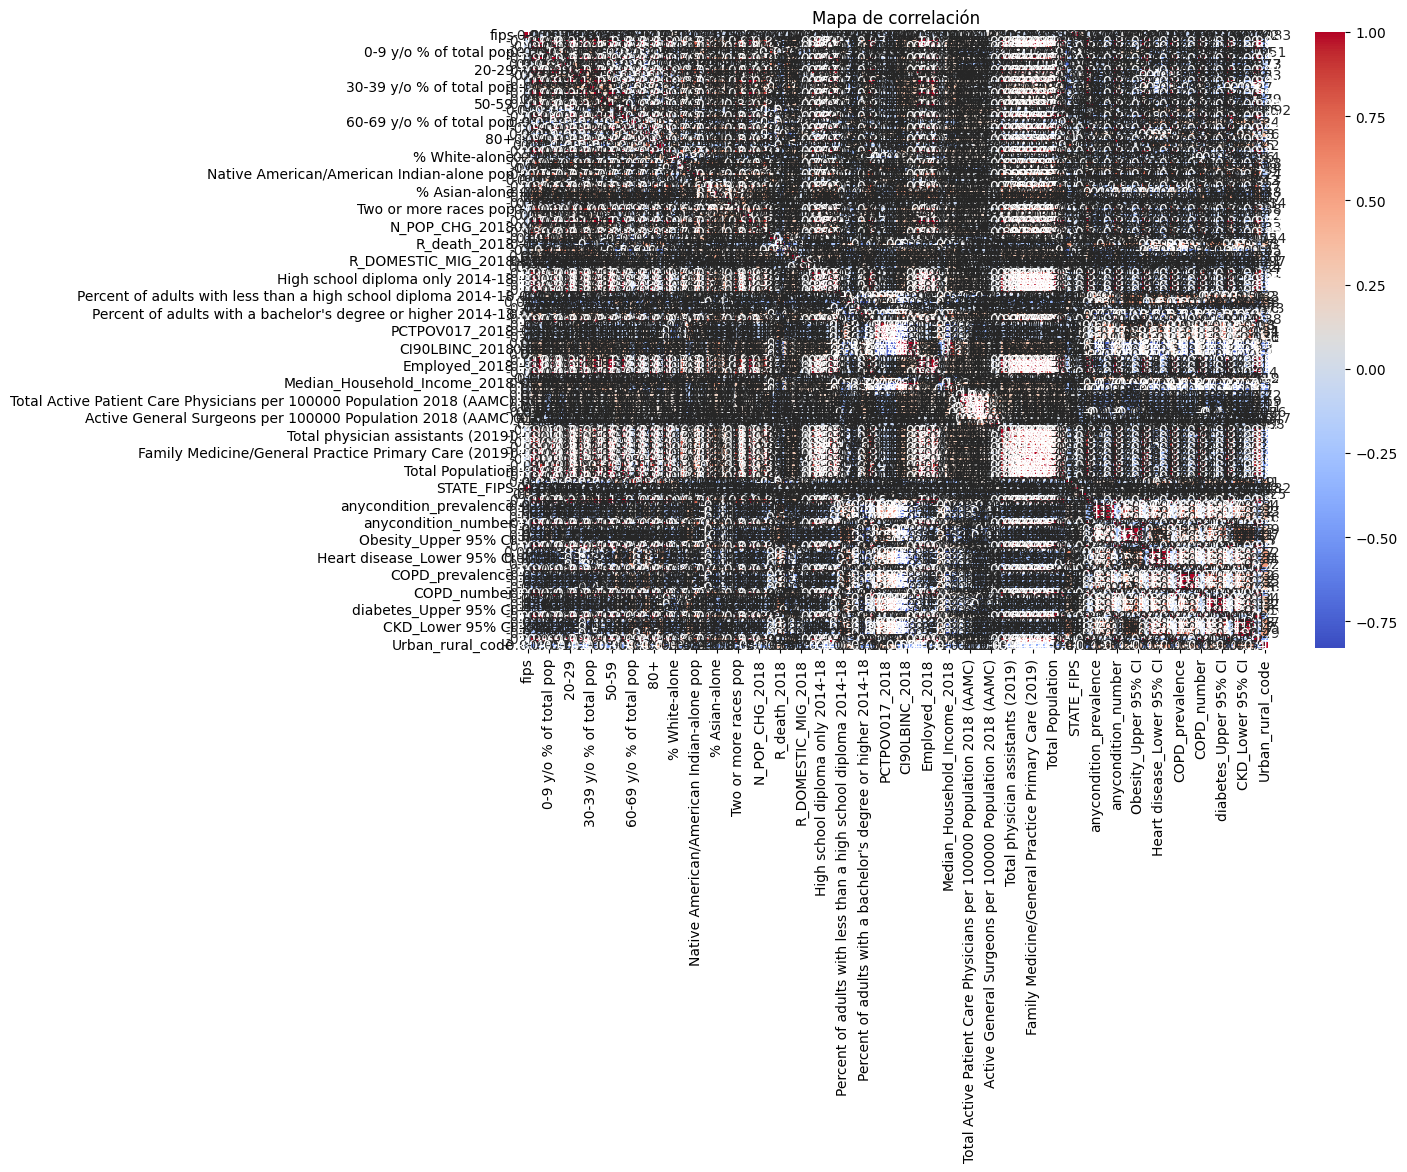

In [44]:
# Filtrar solo columnas numéricas
df_numeric = df.select_dtypes(include='number')

# Visualizar la matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de correlación")
plt.show()


In [45]:
print(len(df.columns))
print(df.columns.tolist())

108
['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with

anycondition_prevalence -> nulos: 0 unique: 351


count    3140.000000
mean       46.793917
std         6.379448
min        22.000000
25%        42.900000
50%        47.200000
75%        51.000000
max        66.200000
Name: anycondition_prevalence, dtype: float64

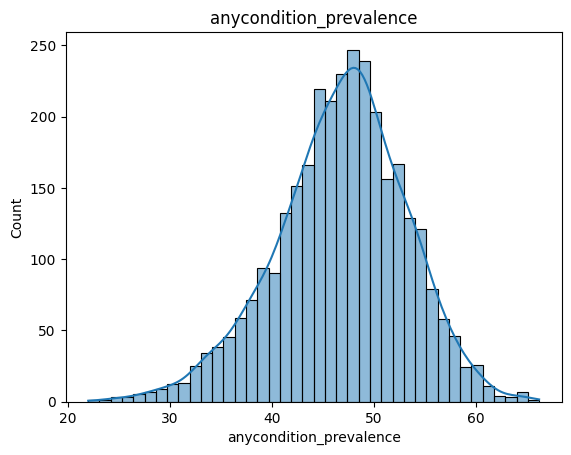

Obesity_prevalence -> nulos: 0 unique: 267


count    3140.000000
mean       35.019299
std         4.517088
min        15.200000
25%        32.400000
50%        35.400000
75%        37.900000
max        49.900000
Name: Obesity_prevalence, dtype: float64

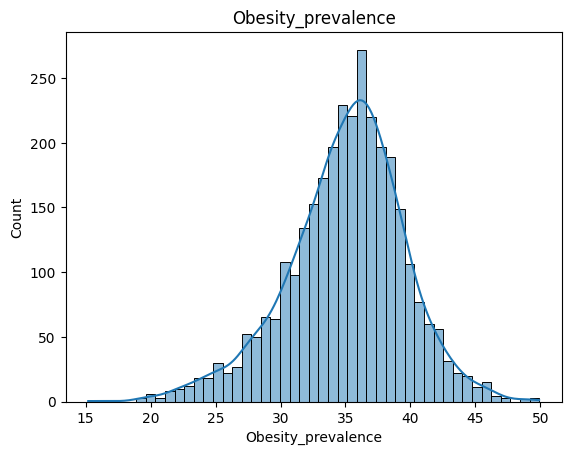

diabetes_prevalence -> nulos: 0 unique: 163


count    3140.000000
mean       13.073503
std         2.724351
min         6.100000
25%        11.200000
50%        12.800000
75%        14.800000
max        25.600000
Name: diabetes_prevalence, dtype: float64

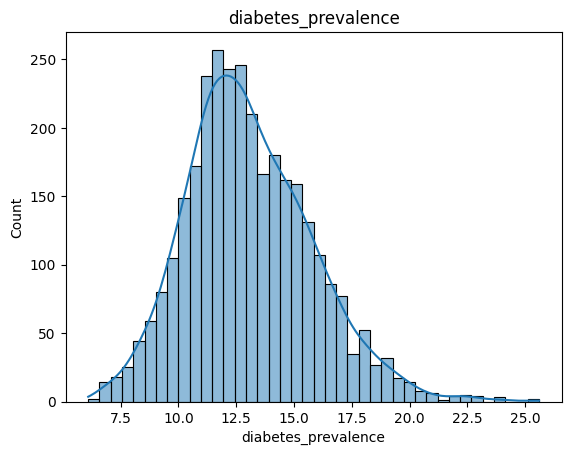

Heart disease_prevalence -> nulos: 0 unique: 106


count    3140.000000
mean        8.607803
std         1.758587
min         3.500000
25%         7.400000
50%         8.600000
75%         9.800000
max        15.100000
Name: Heart disease_prevalence, dtype: float64

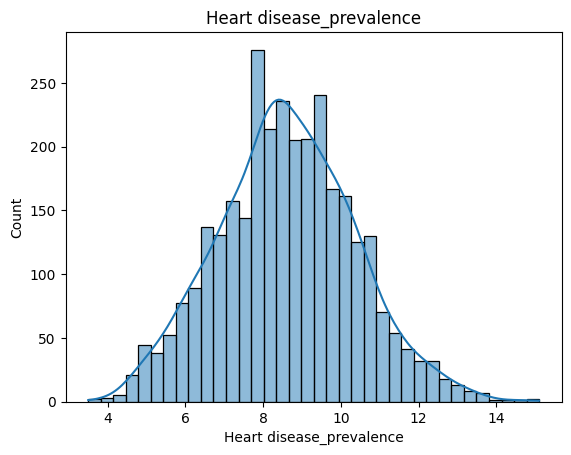

COPD_prevalence -> nulos: 0 unique: 137


count    3140.000000
mean        9.095223
std         2.344965
min         3.500000
25%         7.300000
50%         8.900000
75%        10.600000
max        19.900000
Name: COPD_prevalence, dtype: float64

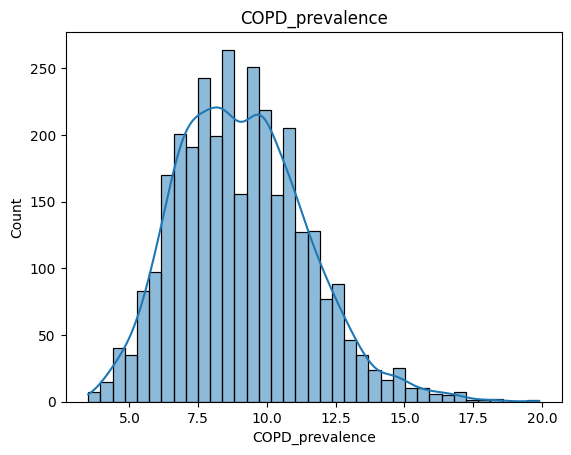

In [46]:
cands = ['anycondition_prevalence','Obesity_prevalence','diabetes_prevalence',
         'Heart disease_prevalence','COPD_prevalence']
for c in cands:
    if c in df.columns:
        print(c, "-> nulos:", df[c].isna().sum(), "unique:", df[c].nunique())
        display(df[c].describe())
        sns.histplot(df[c].dropna(), kde=True); plt.title(c); plt.show()
